Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


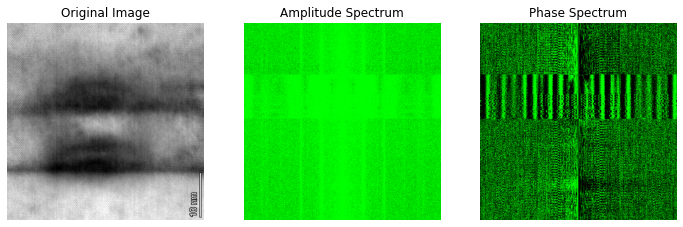

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift

# Load an image (for example purposes, we'll use a sample image from matplotlib)
image = plt.imread("1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png")  # Replace 'sample_image.png' with your image file

# Compute the 2D Fourier Transform of the image
fft_image = fft2(image)
fft_image_shifted = fftshift(fft_image)  # Shift zero frequency component to the center

# Compute the amplitude and phase
amplitude = np.abs(fft_image_shifted)
phase = np.angle(fft_image_shifted)

# Plot the original image, amplitude, and phase
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Amplitude Spectrum")
plt.imshow(np.log(amplitude + 1), cmap='gray')  # Log scale for better visualization
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Phase Spectrum")
plt.imshow(phase, cmap='gray')
plt.axis('off')

plt.show()


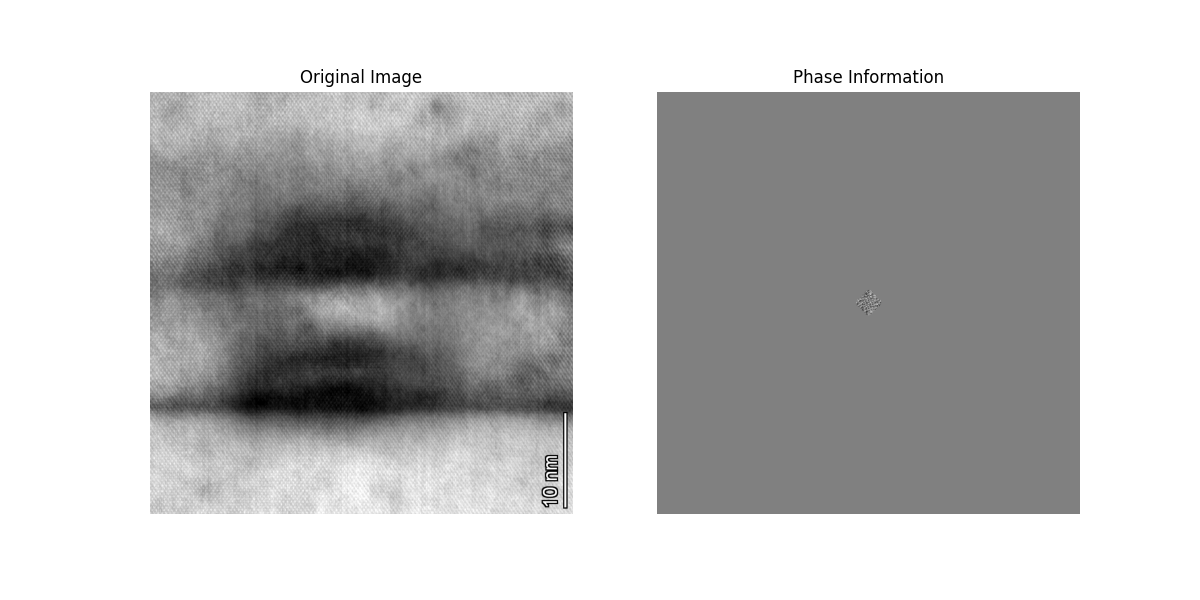

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift, ifftshift

# Load an image (replace 'path_to_image' with the actual image path)
image = plt.imread("1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png")  # Ensure the image is in grayscale or convert it if necessary
if image.ndim == 3:
    image = image[..., 0]  # Convert to grayscale if it is an RGB image

# Compute the 2D Fourier Transform of the image
fft_image = fft2(image)
fft_image_shifted = fftshift(fft_image)  # Shift zero frequency component to the center

# Define the Bragg position vectors (u) based on the periodicities corresponding to Bragg reflections
# For demonstration, assume some example Bragg positions; these need to be provided or computed based on the specific case
bragg_positions = [
    (10, 0),  # Example positions; replace with actual Bragg reflection coordinates
    (-10, 0),
    (0, 10),
    (0, -10)
]

# Define the Masking Function M(k)
def mask_function(shape, bragg_pos, k_radius):
    mask = np.zeros(shape, dtype=np.float32)
    kx_center, ky_center = shape[1] // 2, shape[0] // 2
    for kx, ky in bragg_pos:
        kx_grid, ky_grid = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
        distance = np.sqrt((kx_grid - (kx_center + kx))**2 + (ky_grid - (ky_center + ky))**2)
        mask += np.where(distance <= k_radius, 1, 0)
    return mask

# Define the radius of the first Brillouin zone (needs to be set appropriately)
k_radius = 10  # Example value, adjust as needed

# Apply the masking function
mask = mask_function(fft_image_shifted.shape, bragg_positions, k_radius)
masked_fft_image = fft_image_shifted * mask

# Extract local Fourier components I_g(k) using the equation I_g(k) = I(k + u) M(k)
local_fourier_components = np.zeros_like(masked_fft_image, dtype=np.complex64)
for kx, ky in bragg_positions:
    local_fourier_components += np.roll(masked_fft_image, shift=(ky, kx), axis=(0, 1))

# Extract phase information from the local Fourier components
phase = np.angle(local_fourier_components)

# Plot the original image and the phase information
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Phase Information")
plt.imshow(phase, cmap='gray')
plt.axis('off')

plt.show()


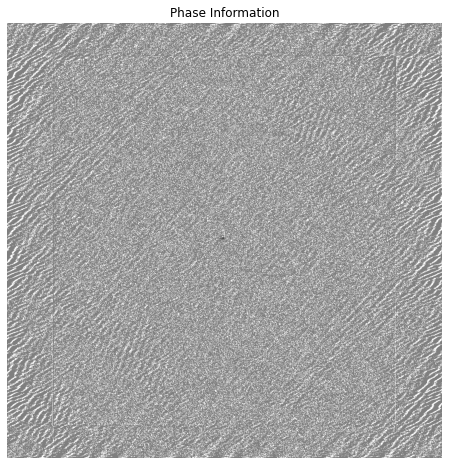

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift

# Load an image (replace 'path_to_image' with the actual image path)
image = plt.imread("1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png")  # Ensure the image is in grayscale or convert it if necessary
if image.ndim == 3:
    image = image[..., 0]  # Convert to grayscale if it is an RGB image

# Compute the 2D Fourier Transform of the image
fft_image = fft2(image)
fft_image_shifted = fftshift(fft_image)  # Shift zero frequency component to the center

# Define the Bragg position vector u
u = np.array([511, 512])  # Replace kx and ky with actual Bragg position coordinates

# Define the Masking Function M(k)
def mask_function(shape, bragg_pos, k_radius):
    mask = np.zeros(shape, dtype=np.float32)
    kx_center, ky_center = shape[1] // 2, shape[0] // 2
    for kx, ky in bragg_pos:
        kx_grid, ky_grid = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
        distance = np.sqrt((kx_grid - (kx_center + kx))**2 + (ky_grid - (ky_center + ky))**2)
        mask += np.where(distance <= k_radius, 1, 0)
    return mask

# Define the radius of the first Brillouin zone (needs to be set appropriately)
k_radius = 10  # Example value, adjust as needed

# Apply the masking function
mask = mask_function(fft_image_shifted.shape, [u], k_radius)
masked_fft_image = fft_image_shifted * mask

# Extract local Fourier components I_g(k) using the equation I_g(k) = I(k + u) M(k)
local_fourier_components = np.roll(masked_fft_image, shift=(u[1], u[0]), axis=(0, 1))

# Extract phase information from the local Fourier components
phase = np.angle(local_fourier_components)

# Plot the phase information
plt.figure(figsize=(8, 8))
plt.title("Phase Information")
plt.imshow(phase, cmap='gray')
plt.axis('off')
plt.show()


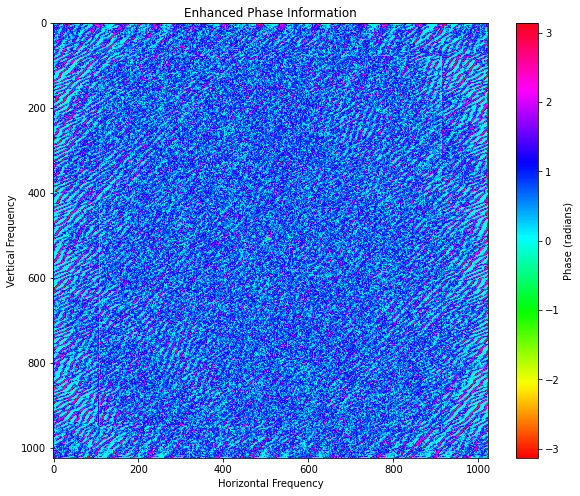

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift

# Load an image (replace 'path_to_image' with the actual image path)
image = plt.imread("1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png")  # Ensure the image is in grayscale or convert it if necessary
if image.ndim == 3:
    image = image[..., 0]  # Convert to grayscale if it is an RGB image

# Compute the 2D Fourier Transform of the image
fft_image = fft2(image)
fft_image_shifted = fftshift(fft_image)  # Shift zero frequency component to the center

# Define the Bragg position vector u
u = np.array([511, 512])  # Replace kx and ky with actual Bragg position coordinates

# Define the Masking Function M(k)
def mask_function(shape, bragg_pos, k_radius):
    mask = np.zeros(shape, dtype=np.float32)
    kx_center, ky_center = shape[1] // 2, shape[0] // 2
    for kx, ky in bragg_pos:
        kx_grid, ky_grid = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
        distance = np.sqrt((kx_grid - (kx_center + kx))**2 + (ky_grid - (ky_center + ky))**2)
        mask += np.where(distance <= k_radius, 1, 0)
    return mask

# Define the radius of the first Brillouin zone (needs to be set appropriately)
k_radius = 10  # Example value, adjust as needed

# Apply the masking function
mask = mask_function(fft_image_shifted.shape, [u], k_radius)
masked_fft_image = fft_image_shifted * mask

# Extract local Fourier components I_g(k) using the equation I_g(k) = I(k + u) M(k)
local_fourier_components = np.roll(masked_fft_image, shift=(u[1], u[0]), axis=(0, 1))

# Extract phase information from the local Fourier components
phase = np.angle(local_fourier_components)

# Plot the phase information with enhanced details
plt.figure(figsize=(10, 8))
plt.title("Enhanced Phase Information")
plt.imshow(phase, cmap='hsv')  # Use 'hsv' colormap for better phase visualization
plt.colorbar(label='Phase (radians)')
plt.xlabel('Horizontal Frequency')
plt.ylabel('Vertical Frequency')
plt.grid(False)
plt.show()


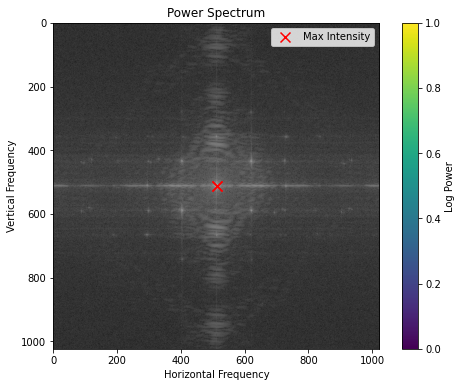

Indices of the two most intense spots in the power spectrum:
Spot 1: [511 512]
Spot 2: [512 512]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift

# Load an image (replace 'path_to_image' with the actual image path)
image = plt.imread("1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png")  # Ensure the image is in grayscale or convert it if necessary
if image.ndim == 3:
    image = image[..., 0]  # Convert to grayscale if it is an RGB image

# Compute the 2D Fourier Transform of the image
fft_image = fft2(image)
fft_image_shifted = fftshift(fft_image)  # Shift zero frequency component to the center

# Compute the squared magnitude of the Fourier transform to obtain the power spectrum
power_spectrum = np.abs(fft_image_shifted)**2

# Find the indices of the two most intense spots in the power spectrum
max_indices = np.unravel_index(np.argsort(power_spectrum, axis=None)[-2:], power_spectrum.shape)

# Plot the power spectrum
plt.figure(figsize=(8, 6))
plt.title("Power Spectrum")
plt.imshow(np.log(power_spectrum + 1), cmap='gray')  # Log scale for better visualization
plt.scatter(max_indices[1], max_indices[0], c='red', s=100, marker='x', label='Max Intensity')
plt.xlabel('Horizontal Frequency')
plt.ylabel('Vertical Frequency')
plt.colorbar(label='Log Power')
plt.legend()
plt.grid(False)
plt.show()

# Print the indices of the two most intense spots
print("Indices of the two most intense spots in the power spectrum:")
for index, max_index in enumerate(max_indices):
    print(f"Spot {index + 1}: {max_index}")


Indices of bright spots in the power spectrum:
Spot at (512, 512)


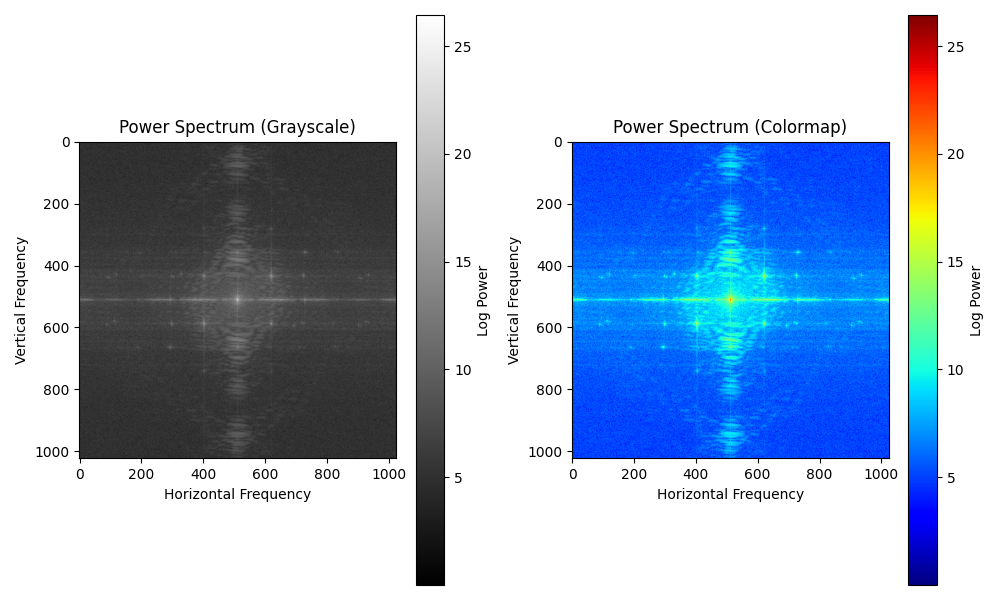

In [6]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift

# Load the image
image = plt.imread('1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png')  

# Ensure the image is in grayscale or convert it if necessary
if image.ndim == 3:
    image = image[..., 0]  

# Compute the 2D Fourier Transform of the image
fft_image = fft2(image)
fft_image_shifted = fftshift(fft_image)  # Shift zero frequency component to the center

# Compute the squared magnitude of the Fourier transform to obtain the power spectrum
power_spectrum = np.abs(fft_image_shifted)**2

# Find bright spots in the power spectrum (defined as pixels with values above a certain threshold)
threshold = 0.5 * np.max(power_spectrum)  # Adjust threshold as needed
bright_spots_indices = np.where(power_spectrum > threshold)

# Plot grayscale representation of the power spectrum
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title("Power Spectrum (Grayscale)")
plt.imshow(np.log(power_spectrum + 1), cmap='gray')  # Log scale for better visualization
plt.xlabel('Horizontal Frequency')
plt.ylabel('Vertical Frequency')
plt.colorbar(label='Log Power')
plt.grid(False)

# Plot color map representation of the power spectrum
plt.subplot(1, 2, 2)
plt.title("Power Spectrum (Colormap)")
plt.imshow(np.log(power_spectrum + 1), cmap='jet')  # Using 'jet' colormap for color representation
plt.xlabel('Horizontal Frequency')
plt.ylabel('Vertical Frequency')
plt.colorbar(label='Log Power')
plt.grid(False)

# Print the indices of all bright spots in the power spectrum
print("Indices of bright spots in the power spectrum:")
for i, j in zip(*bright_spots_indices):
    print(f"Spot at ({i}, {j})")

plt.tight_layout()
plt.show()


In [5]:
import numpy as np

# Load the image
image = plt.imread('1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png')  

# Ensure the image is in grayscale or convert it if necessary
if image.ndim == 3:
    image = image[..., 0]  

# Compute the 2D Fourier Transform of the image
fft_image = fft2(image)
fft_image_shifted = fftshift(fft_image)  # Shift zero frequency component to the center

# Define the coordinates for the two most intense spots in the power spectrum
g1 = (512, 660)
g2 = (400, 580)

# Define the size of the Gaussian mask
mask_size = 50

# Define Gaussian masks centered at the coordinates corresponding to the G vectors
x, y = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
mask1 = np.exp(-((x - g1[1])**2 + (y - g1[0])**2) / (2 * mask_size**2))
mask2 = np.exp(-((x - g2[1])**2 + (y - g2[0])**2) / (2 * mask_size**2))

# Apply the Gaussian masks to the Fourier-transformed image to create masked images
masked_fft_image1 = fft_image_shifted * mask1
masked_fft_image2 = fft_image_shifted * mask2

# Perform inverse Fourier transform to obtain complex images
complex_image1 = ifftshift(ifft2(ifftshift(masked_fft_image1)))
complex_image2 = ifftshift(ifft2(ifftshift(masked_fft_image2)))

# Calculate Bragg filtered images
B1 = 2 * np.real(complex_image1)
B2 = 2 * np.real(complex_image2)

# Calculate phase images
Pg1 = np.angle(complex_image1) - 2*np.pi*(g1[1]*x + g1[0]*y)
Pg2 = np.angle(complex_image2) - 2*np.pi*(g2[1]*x + g2[0]*y)

# Calculate raw phase images
Pp1 = np.angle(complex_image1)
Pp2 = np.angle(complex_image2)

# Plot the resulting images for both G vectors separately
plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)
plt.title("Masked Image (G1)")
plt.imshow(np.abs(masked_fft_image1), cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title("Masked Image (G2)")
plt.imshow(np.abs(masked_fft_image2), cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title("Bragg Filtered Image (G1)")
plt.imshow(B1, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title("Bragg Filtered Image (G2)")
plt.imshow(B2, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title("Phase Image (G1)")
plt.imshow(Pg1, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title("Phase Image (G2)")
plt.imshow(Pg2, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title("Raw Phase Image (G1)")
plt.imshow(Pp1, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title("Raw Phase Image (G2)")
plt.imshow(Pp2, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.tight_layout()
plt.show()


NameError: name 'ifftshift' is not defined

In [8]:
# Load the image
image = plt.imread('1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png')  

# Ensure the image is in grayscale or convert it if necessary
if image.ndim == 3:
    image = image[..., 0]  

# Compute the 2D Fourier Transform of the image
fft_image = fft2(image)
fft_image_shifted = fftshift(fft_image)  # Shift zero frequency component to the center

# Define the coordinates for the two most intense spots in the power spectrum
g1 = (512, 660)
g2 = (620, 586)

# Define the size of the Gaussian mask
mask_size = 30

# Define Gaussian masks centered at the coordinates corresponding to the G vectors
x, y = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
mask1 = np.exp(-((x - g1[1])**2 + (y - g1[0])**2) / (2 * mask_size**2))
mask2 = np.exp(-((x - g2[1])**2 + (y - g2[0])**2) / (2 * mask_size**2))

# Apply the Gaussian masks to the Fourier-transformed image to create masked images
masked_fft_image1 = fft_image_shifted * mask1
masked_fft_image2 = fft_image_shifted * mask2

# Perform inverse Fourier transform to obtain complex images
complex_image1 = ifftshift(ifft2(ifftshift(masked_fft_image1)))
complex_image2 = ifftshift(ifft2(ifftshift(masked_fft_image2)))

# Calculate Bragg filtered images
B1 = 2 * np.real(complex_image1)
B2 = 2 * np.real(complex_image2)

# Calculate phase images
Pg1 = np.angle(complex_image1) - 2*np.pi*(g1[1]*x + g1[0]*y)
Pg2 = np.angle(complex_image2) - 2*np.pi*(g2[1]*x + g2[0]*y)

# Calculate raw phase images
Pp1 = np.angle(complex_image1)
Pp2 = np.angle(complex_image2)

# Plot the resulting images for both G vectors separately
plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)
plt.title("Masked Image (G1)")
plt.imshow(np.abs(masked_fft_image1), cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title("Masked Image (G2)")
plt.imshow(np.abs(masked_fft_image2), cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title("Bragg Filtered Image (G1)")
plt.imshow(B1, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title("Bragg Filtered Image (G2)")
plt.imshow(B2, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title("Phase Image (G1)")
plt.imshow(Pg1, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title("Phase Image (G2)")
plt.imshow(Pg2, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title("Raw Phase Image (G1)")
plt.imshow(Pp1, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title("Raw Phase Image (G2)")
plt.imshow(Pp2, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.tight_layout()
plt.show()


NameError: name 'ifftshift' is not defined

In [9]:
# Load the image
image = plt.imread('1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png')  

# Ensure the image is in grayscale or convert it if necessary
if image.ndim == 3:
    image = image[..., 0]  

# Compute the 2D Fourier Transform of the image
fft_image = fft2(image)
fft_image_shifted = fftshift(fft_image)  # Shift zero frequency component to the center

# Define the coordinates for the two most intense spots in the power spectrum
g1 = (646, 428)
g2 = (512, 350)

# Define the size of the Gaussian mask
mask_size = 30

# Define Gaussian masks centered at the coordinates corresponding to the G vectors
x, y = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
mask1 = np.exp(-((x - g1[1])**2 + (y - g1[0])**2) / (2 * mask_size**2))
mask2 = np.exp(-((x - g2[1])**2 + (y - g2[0])**2) / (2 * mask_size**2))

# Apply the Gaussian masks to the Fourier-transformed image to create masked images
masked_fft_image1 = fft_image_shifted * mask1
masked_fft_image2 = fft_image_shifted * mask2

# Perform inverse Fourier transform to obtain complex images
complex_image1 = ifftshift(ifft2(ifftshift(masked_fft_image1)))
complex_image2 = ifftshift(ifft2(ifftshift(masked_fft_image2)))

# Calculate Bragg filtered images
B1 = 2 * np.real(complex_image1)
B2 = 2 * np.real(complex_image2)

# Calculate phase images
Pg1 = np.angle(complex_image1) - 2*np.pi*(g1[1]*x + g1[0]*y)
Pg2 = np.angle(complex_image2) - 2*np.pi*(g2[1]*x + g2[0]*y)

# Calculate raw phase images
Pp1 = np.angle(complex_image1)
Pp2 = np.angle(complex_image2)

# Plot the resulting images for both G vectors separately
plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)
plt.title("Masked Image (G1)")
plt.imshow(np.abs(masked_fft_image1), cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title("Masked Image (G2)")
plt.imshow(np.abs(masked_fft_image2), cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title("Bragg Filtered Image (G1)")
plt.imshow(B1, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title("Bragg Filtered Image (G2)")
plt.imshow(B2, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title("Phase Image (G1)")
plt.imshow(Pg1, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title("Phase Image (G2)")
plt.imshow(Pg2, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title("Raw Phase Image (G1)")
plt.imshow(Pp1, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title("Raw Phase Image (G2)")
plt.imshow(Pp2, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.tight_layout()
plt.show()


NameError: name 'ifftshift' is not defined

In [10]:
# Load the image
image = plt.imread('1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png')  

# Ensure the image is in grayscale or convert it if necessary
if image.ndim == 3:
    image = image[..., 0]  

# Compute the 2D Fourier Transform of the image
fft_image = fft2(image)
fft_image_shifted = fftshift(fft_image)  # Shift zero frequency component to the center

# Define the coordinates for the two most intense spots in the power spectrum
g1 = (405, 425)
g2 = (512, 350)

# Define the size of the Gaussian mask
mask_size = 30

# Define Gaussian masks centered at the coordinates corresponding to the G vectors
x, y = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
mask1 = np.exp(-((x - g1[1])**2 + (y - g1[0])**2) / (2 * mask_size**2))
mask2 = np.exp(-((x - g2[1])**2 + (y - g2[0])**2) / (2 * mask_size**2))

# Apply the Gaussian masks to the Fourier-transformed image to create masked images
masked_fft_image1 = fft_image_shifted * mask1
masked_fft_image2 = fft_image_shifted * mask2

# Perform inverse Fourier transform to obtain complex images
complex_image1 = ifftshift(ifft2(ifftshift(masked_fft_image1)))
complex_image2 = ifftshift(ifft2(ifftshift(masked_fft_image2)))

# Calculate Bragg filtered images
B1 = 2 * np.real(complex_image1)
B2 = 2 * np.real(complex_image2)

# Calculate phase images
Pg1 = np.angle(complex_image1) - 2*np.pi*(g1[1]*x + g1[0]*y)
Pg2 = np.angle(complex_image2) - 2*np.pi*(g2[1]*x + g2[0]*y)

# Calculate raw phase images
Pp1 = np.angle(complex_image1)
Pp2 = np.angle(complex_image2)

# Plot the resulting images for both G vectors separately
plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)
plt.title("Masked Image (G1)")
plt.imshow(np.abs(masked_fft_image1), cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title("Masked Image (G2)")
plt.imshow(np.abs(masked_fft_image2), cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title("Bragg Filtered Image (G1)")
plt.imshow(B1, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title("Bragg Filtered Image (G2)")
plt.imshow(B2, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title("Phase Image (G1)")
plt.imshow(Pg1, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title("Phase Image (G2)")
plt.imshow(Pg2, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title("Raw Phase Image (G1)")
plt.imshow(Pp1, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title("Raw Phase Image (G2)")
plt.imshow(Pp2, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.tight_layout()
plt.show()


NameError: name 'ifftshift' is not defined

In [11]:
# Load the image
image = plt.imread('1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png')  

# Ensure the image is in grayscale or convert it if necessary
if image.ndim == 3:
    image = image[..., 0]  

# Compute the 2D Fourier Transform of the image
fft_image = fft2(image)
fft_image_shifted = fftshift(fft_image)  # Shift zero frequency component to the center

# Define the coordinates for the two most intense spots in the power spectrum
g1 = (512, 660)
g2 = (620, 586)

# Define the size of the Gaussian mask
mask_size = 30

# Define Gaussian masks centered at the coordinates corresponding to the G vectors
x, y = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
mask1 = np.exp(-((x - g1[1])**2 + (y - g1[0])**2) / (2 * mask_size**2))
mask2 = np.exp(-((x - g2[1])**2 + (y - g2[0])**2) / (2 * mask_size**2))

# Apply the Gaussian masks to the Fourier-transformed image to create masked images
masked_fft_image1 = fft_image_shifted * mask1
masked_fft_image2 = fft_image_shifted * mask2

# Perform inverse Fourier transform to obtain complex images
complex_image1 = ifftshift(ifft2(ifftshift(masked_fft_image1)))
complex_image2 = ifftshift(ifft2(ifftshift(masked_fft_image2)))

# Calculate Bragg filtered images
B1 = 2 * np.real(complex_image1)
B2 = 2 * np.real(complex_image2)

# Calculate phase images
Pg1 = np.angle(complex_image1) - 2*np.pi*(g1[1]*x + g1[0]*y)
Pg2 = np.angle(complex_image2) - 2*np.pi*(g2[1]*x + g2[0]*y)

# Calculate raw phase images
Pp1 = np.angle(complex_image1)
Pp2 = np.angle(complex_image2)

# Plot the resulting images for both G vectors separately
plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)
plt.title("Masked Image (G1)")
plt.imshow(np.abs(masked_fft_image1), cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title("Masked Image (G2)")
plt.imshow(np.abs(masked_fft_image2), cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title("Bragg Filtered Image (G1)")
plt.imshow(B1, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title("Bragg Filtered Image (G2)")
plt.imshow(B2, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title("Phase Image (G1)")
plt.imshow(Pg1, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title("Phase Image (G2)")
plt.imshow(Pg2, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title("Raw Phase Image (G1)")
plt.imshow(Pp1, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title("Raw Phase Image (G2)")
plt.imshow(Pp2, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.tight_layout()
plt.show()


NameError: name 'ifftshift' is not defined

In [12]:
# Load the raw phase image calculated earlier
raw_phase_image1 = Pp1
raw_phase_image2 = Pp2

# Gaussian filtering to smooth the raw phase image
raw_phase_image_smoothed1 = gaussian_filter(raw_phase_image1, sigma=2)
raw_phase_image_smoothed2 = gaussian_filter(raw_phase_image2, sigma=2)

# Calculate displacement field from raw phase image
displacement_field_x1, displacement_field_y1 = calculate_displacement_field(raw_phase_image_smoothed1)
displacement_field_x2, displacement_field_y2 = calculate_displacement_field(raw_phase_image_smoothed2)

# Calculate strain components from displacement field gradients
strain_xx1, strain_xy1, strain_yx1, strain_yy1 = calculate_strain(displacement_field_x1, displacement_field_y1)
strain_xx2, strain_xy2, strain_yx2, strain_yy2 = calculate_strain(displacement_field_x2, displacement_field_y2)

# Plot strain components separately
plot_strain_components(strain_xx1, strain_xy1, strain_yx1, strain_yy1)
plot_strain_components(strain_xx2, strain_xy2, strain_yx2, strain_yy2)

# Calculate line profiles of strain components
line_profile_xx1 = calculate_line_profile(strain_xx1, axis=0)
line_profile_xy1 = calculate_line_profile(strain_xy1, axis=0)
line_profile_yx1 = calculate_line_profile(strain_yx1, axis=1)
line_profile_yy1 = calculate_line_profile(strain_yy1, axis=1)

line_profile_xx2 = calculate_line_profile(strain_xx2, axis=0)
line_profile_xy2 = calculate_line_profile(strain_xy2, axis=0)
line_profile_yx2 = calculate_line_profile(strain_yx2, axis=1)
line_profile_yy2 = calculate_line_profile(strain_yy2, axis=1)

# Plot line profiles of strain components
plt.figure(figsize=(12, 6))
plt.plot(line_profile_xx1, label='Strain xx (G1)')
plt.plot(line_profile_xy1, label='Strain xy (G1)')
plt.plot(line_profile_yx1, label='Strain yx (G1)')
plt.plot(line_profile_yy1, label='Strain yy (G1)')
plt.plot(line_profile_xx2, label='Strain xx (G2)')
plt.plot(line_profile_xy2, label='Strain xy (G2)')
plt.plot(line_profile_yx2, label='Strain yx (G2)')
plt.plot(line_profile_yy2, label='Strain yy (G2)')
plt.xlabel('Position')
plt.ylabel('Strain')
plt.title('Line Profiles of Strain Components')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'Pp1' is not defined

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from scipy.ndimage import gaussian_filter

def load_image(image_path):
    """Load an image from a file."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return img

def preprocess_image(img, sigma=1):
    """Preprocess the image by applying Gaussian filtering."""
    return gaussian_filter(img, sigma=sigma)

def compute_fft(img):
    """Compute the Fourier Transform of the image."""
    return fftshift(fft2(img))

def mask_fft(fft_img, mask_radius, center):
    """Apply a circular mask to the FFT image."""
    rows, cols = fft_img.shape
    mask = np.zeros((rows, cols), dtype=np.uint8)
    cv2.circle(mask, center, mask_radius, 1, thickness=-1)
    masked_fft = fft_img * mask
    return masked_fft

def inverse_fft(masked_fft):
    """Compute the inverse FFT to obtain the phase information."""
    return ifft2(ifftshift(masked_fft))

def unwrap_phase(phase):
    """Unwrap the phase."""
    return np.unwrap(np.angle(phase))

def compute_strain(phase, reference_phase):
    """Compute the strain from the phase difference."""
    return (phase - reference_phase) / (2 * np.pi)

def main(image_path, mask_radius, center):
    """Main function to perform GPA."""
    # Step 1: Load the image
    img = load_image(image_path)

    # Step 2: Preprocess the image
    preprocessed_img = preprocess_image(img)

    # Step 3: Compute FFT
    fft_img = compute_fft(preprocessed_img)

    # Step 4: Apply masking and inverse FFT
    masked_fft = mask_fft(fft_img, mask_radius, center)
    complex_img = inverse_fft(masked_fft)

    # Step 5: Extract and unwrap phase
    phase = unwrap_phase(np.angle(complex_img))

    # Step 6: Choose a reference phase (use unstrained region or average)
    reference_phase = np.mean(phase)  # This is a simplification; choose based on your specific needs

    # Step 7: Compute strain
    strain = compute_strain(phase, reference_phase)

    # Step 8: Visualize the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(strain, cmap='seismic', vmin=-0.01, vmax=0.01)
    plt.colorbar()
    plt.title('Strain Map')
    plt.show()

# Parameters for the analysis
image_path = '1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png'  # Replace with your image path
mask_radius = 30  # Radius of the circular mask in pixels
center = (256, 256)  # Center of the FFT image (should be half the image dimensions for square images)

# Run the GPA
main(image_path, mask_radius, center)


ModuleNotFoundError: No module named 'cv2'

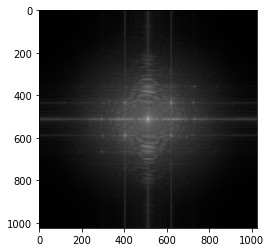

ValueError: Two Bragg spots must be selected.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from scipy.ndimage import gaussian_filter, generate_binary_structure, binary_dilation

def load_image(image_path):
    """Load an image from a file."""
    img = plt.imread(image_path)
    if img.ndim == 3:
        img = img[:, :, 0]
    return img

def preprocess_image(img, sigma=1):
    """Preprocess the image by applying Gaussian filtering."""
    return gaussian_filter(img, sigma=sigma)

def compute_fft(img):
    """Compute the Fourier Transform of the image."""
    return fftshift(fft2(img))

def create_circular_mask(shape, center, radius):
    """Create a circular mask."""
    Y, X = np.ogrid[:shape[0], :shape[1]]
    dist_from_center = np.sqrt((X - center[0]) ** 2 + (Y - center[1]) ** 2)
    mask = dist_from_center <= radius
    return mask

def mask_fft(fft_img, mask_radius, center):
    """Apply a circular mask to the FFT image."""
    mask = create_circular_mask(fft_img.shape, center, mask_radius)
    masked_fft = fft_img * mask
    return masked_fft

def inverse_fft(masked_fft):
    """Compute the inverse FFT to obtain the phase information."""
    return ifft2(ifftshift(masked_fft))

def unwrap_phase(phase):
    """Unwrap the phase."""
    return np.unwrap(np.angle(phase))

def compute_strain(phase, reference_phase):
    """Compute the strain from the phase difference."""
    return (phase - reference_phase) / (2 * np.pi)

def select_bragg_spots(fft_img):
    """Interactive function to select Bragg spots from the FFT image."""
    spots = []
    
    def onclick(event):
        ix, iy = int(event.xdata), int(event.ydata)
        spots.append((ix, iy))
        plt.scatter(ix, iy, c='r', marker='x')
        plt.draw()
        if len(spots) == 2:
            plt.close()

    fig, ax = plt.subplots()
    ax.imshow(np.log1p(np.abs(fft_img)), cmap='gray')
    fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()
    
    return spots

def main(image_path, mask_radius):
    """Main function to perform GPA."""
    # Step 1: Load the image
    img = load_image(image_path)

    # Step 2: Preprocess the image
    preprocessed_img = preprocess_image(img)

    # Step 3: Compute FFT
    fft_img = compute_fft(preprocessed_img)

    # Step 4: Select Bragg spots
    bragg_spots = select_bragg_spots(fft_img)
    if len(bragg_spots) != 2:
        raise ValueError("Two Bragg spots must be selected.")

    # Step 5: Apply masking and inverse FFT for each Bragg spot
    complex_images = []
    for center in bragg_spots:
        masked_fft = mask_fft(fft_img, mask_radius, center)
        complex_img = inverse_fft(masked_fft)
        complex_images.append(complex_img)

    # Step 6: Extract and unwrap phase
    phases = [unwrap_phase(np.angle(ci)) for ci in complex_images]

    # Step 7: Choose a reference phase (use unstrained region or average)
    reference_phase = np.mean(phases[0])  # This is a simplification; choose based on your specific needs

    # Step 8: Compute strain
    strains = [compute_strain(phase, reference_phase) for phase in phases]

    # Step 9: Visualize the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    
    for i, strain in enumerate(strains, 2):
        plt.subplot(1, 3, i)
        plt.imshow(strain, cmap='seismic', vmin=-0.01, vmax=0.01)
        plt.colorbar()
        plt.title(f'Strain Map {i-1}')

    plt.show()

# Parameters for the analysis
image_path = '1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png'  # Replace with your image path
mask_radius = 30  # Radius of the circular mask in pixels

# Run the GPA
main(image_path, mask_radius)


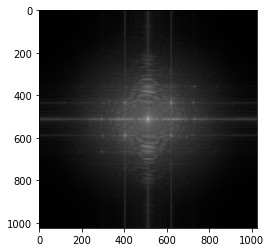

ValueError: Two Bragg spots must be selected.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from scipy.ndimage import gaussian_filter

def load_image(image_path):
    """Load an image from a file."""
    img = plt.imread(image_path)
    if img.ndim == 3:
        img = img[:, :, 0]
    return img

def preprocess_image(img, sigma=1):
    """Preprocess the image by applying Gaussian filtering."""
    return gaussian_filter(img, sigma=sigma)

def compute_fft(img):
    """Compute the Fourier Transform of the image."""
    return fftshift(fft2(img))

def create_circular_mask(shape, center, radius):
    """Create a circular mask."""
    Y, X = np.ogrid[:shape[0], :shape[1]]
    dist_from_center = np.sqrt((X - center[0]) ** 2 + (Y - center[1]) ** 2)
    mask = dist_from_center <= radius
    return mask

def mask_fft(fft_img, mask_radius, center):
    """Apply a circular mask to the FFT image."""
    mask = create_circular_mask(fft_img.shape, center, mask_radius)
    masked_fft = fft_img * mask
    return masked_fft

def inverse_fft(masked_fft):
    """Compute the inverse FFT to obtain the phase information."""
    return ifft2(ifftshift(masked_fft))

def unwrap_phase(phase):
    """Unwrap the phase."""
    return np.unwrap(np.angle(phase))

def compute_strain(phase_x, phase_y):
    """Compute the strain components from phase gradients."""
    gradient_xx = np.gradient(phase_x, axis=1)
    gradient_yy = np.gradient(phase_y, axis=0)
    gradient_xy_x = np.gradient(phase_x, axis=0)
    gradient_xy_y = np.gradient(phase_y, axis=1)
    gradient_xy = (gradient_xy_x + gradient_xy_y) / 2

    strain_xx = gradient_xx / (2 * np.pi)
    strain_yy = gradient_yy / (2 * np.pi)
    strain_xy = gradient_xy / (2 * np.pi)
    
    return strain_xx, strain_yy, strain_xy

def select_bragg_spots(fft_img):
    """Interactive function to select Bragg spots from the FFT image."""
    spots = []

    def onclick(event):
        ix, iy = int(event.xdata), int(event.ydata)
        spots.append((ix, iy))
        plt.scatter(ix, iy, c='r', marker='x')
        plt.draw()
        if len(spots) == 2:
            plt.gcf().canvas.mpl_disconnect(cid)
            plt.close()

    fig, ax = plt.subplots()
    ax.imshow(np.log1p(np.abs(fft_img)), cmap='gray')
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()
    
    return spots

def main(image_path, mask_radius):
    """Main function to perform GPA."""
    # Step 1: Load the image
    img = load_image(image_path)

    # Step 2: Preprocess the image
    preprocessed_img = preprocess_image(img)

    # Step 3: Compute FFT
    fft_img = compute_fft(preprocessed_img)

    # Step 4: Select Bragg spots
    bragg_spots = select_bragg_spots(fft_img)
    if len(bragg_spots) != 2:
        raise ValueError("Two Bragg spots must be selected.")

    # Step 5: Apply masking and inverse FFT for each Bragg spot
    complex_images = []
    for center in bragg_spots:
        masked_fft = mask_fft(fft_img, mask_radius, center)
        complex_img = inverse_fft(masked_fft)
        complex_images.append(complex_img)

    # Step 6: Extract and unwrap phase
    phases = [unwrap_phase(np.angle(ci)) for ci in complex_images]

    # Step 7: Compute strain components
    strain_xx, strain_yy, strain_xy = compute_strain(phases[0], phases[1])

    # Step 8: Visualize the results
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 4, 2)
    plt.imshow(strain_xx, cmap='seismic', vmin=-0.01, vmax=0.01)
    plt.colorbar()
    plt.title('Strain XX')

    plt.subplot(1, 4, 3)
    plt.imshow(strain_xy, cmap='seismic', vmin=-0.01, vmax=0.01)
    plt.colorbar()
    plt.title('Strain XY')

    plt.subplot(1, 4, 4)
    plt.imshow(strain_yy, cmap='seismic', vmin=-0.01, vmax=0.01)
    plt.colorbar()
    plt.title('Strain YY')

    plt.show()

# Parameters for the analysis
image_path = '1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png'  # Replace with your image path
mask_radius = 30  # Radius of the circular mask in pixels

# Run the GPA
main(image_path, mask_radius)


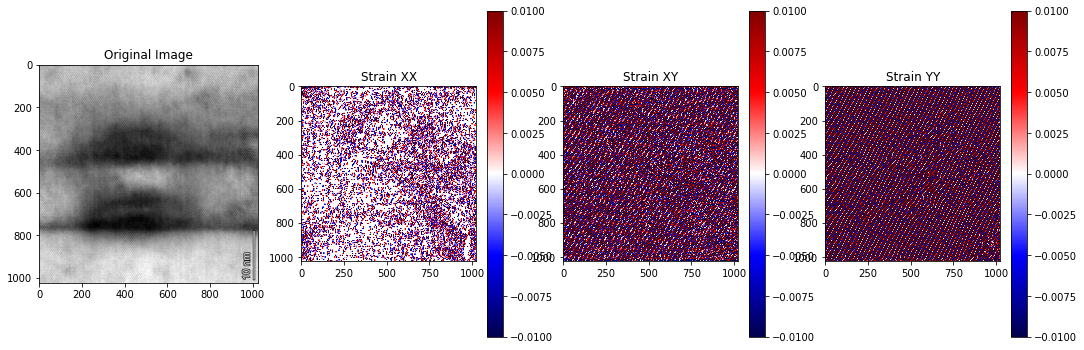

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from scipy.ndimage import gaussian_filter

def load_image(image_path):
    """Load an image from a file."""
    img = plt.imread(image_path)
    if img.ndim == 3:
        img = img[:, :, 0]
    return img

def preprocess_image(img, sigma=1):
    """Preprocess the image by applying Gaussian filtering."""
    return gaussian_filter(img, sigma=sigma)

def compute_fft(img):
    """Compute the Fourier Transform of the image."""
    return fftshift(fft2(img))

def create_circular_mask(shape, center, radius):
    """Create a circular mask."""
    Y, X = np.ogrid[:shape[0], :shape[1]]
    dist_from_center = np.sqrt((X - center[0]) ** 2 + (Y - center[1]) ** 2)
    mask = dist_from_center <= radius
    return mask

def mask_fft(fft_img, mask_radius, center):
    """Apply a circular mask to the FFT image."""
    mask = create_circular_mask(fft_img.shape, center, mask_radius)
    masked_fft = fft_img * mask
    return masked_fft

def inverse_fft(masked_fft):
    """Compute the inverse FFT to obtain the phase information."""
    return ifft2(ifftshift(masked_fft))

def unwrap_phase(phase):
    """Unwrap the phase."""
    return np.unwrap(np.angle(phase))

def compute_strain(phase_x, phase_y):
    """Compute the strain components from phase gradients."""
    gradient_xx = np.gradient(phase_x, axis=1)
    gradient_yy = np.gradient(phase_y, axis=0)
    gradient_xy_x = np.gradient(phase_x, axis=0)
    gradient_xy_y = np.gradient(phase_y, axis=1)
    gradient_xy = (gradient_xy_x + gradient_xy_y) / 2

    strain_xx = gradient_xx / (2 * np.pi)
    strain_yy = gradient_yy / (2 * np.pi)
    strain_xy = gradient_xy / (2 * np.pi)
    
    return strain_xx, strain_yy, strain_xy

def main(image_path, mask_radius, bragg_spots):
    """Main function to perform GPA."""
    # Step 1: Load the image
    img = load_image(image_path)

    # Step 2: Preprocess the image
    preprocessed_img = preprocess_image(img)

    # Step 3: Compute FFT
    fft_img = compute_fft(preprocessed_img)

    # Step 4: Apply masking and inverse FFT for each Bragg spot
    complex_images = []
    for center in bragg_spots:
        masked_fft = mask_fft(fft_img, mask_radius, center)
        complex_img = inverse_fft(masked_fft)
        complex_images.append(complex_img)

    # Step 5: Extract and unwrap phase
    phases = [unwrap_phase(np.angle(ci)) for ci in complex_images]

    # Step 6: Compute strain components
    strain_xx, strain_yy, strain_xy = compute_strain(phases[0], phases[1])

    # Step 7: Visualize the results
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 4, 2)
    plt.imshow(strain_xx, cmap='seismic', vmin=-0.01, vmax=0.01)
    plt.colorbar()
    plt.title('Strain XX')

    plt.subplot(1, 4, 3)
    plt.imshow(strain_xy, cmap='seismic', vmin=-0.01, vmax=0.01)
    plt.colorbar()
    plt.title('Strain XY')

    plt.subplot(1, 4, 4)
    plt.imshow(strain_yy, cmap='seismic', vmin=-0.01, vmax=0.01)
    plt.colorbar()
    plt.title('Strain YY')

    plt.show()

# Parameters for the analysis
image_path = '1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png'  # Replace with your image path
mask_radius = 30  # Radius of the circular mask in pixels

# Manually specify Bragg spot coordinates (x, y)
bragg_spots = [(512, 660), (400, 580)]  # Replace with your actual Bragg spot coordinates

# Run the GPA
main(image_path, mask_radius, bragg_spots)


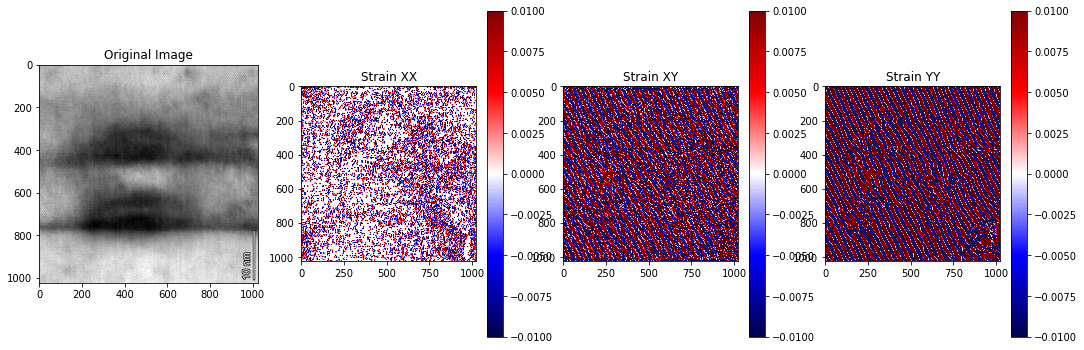

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from scipy.ndimage import gaussian_filter

def load_image(image_path):
    """Load an image from a file."""
    img = plt.imread(image_path)
    if img.ndim == 3:
        img = img[:, :, 0]
    return img

def preprocess_image(img, sigma=1):
    """Preprocess the image by applying Gaussian filtering."""
    return gaussian_filter(img, sigma=sigma)

def compute_fft(img):
    """Compute the Fourier Transform of the image."""
    return fftshift(fft2(img))

def create_circular_mask(shape, center, radius):
    """Create a circular mask."""
    Y, X = np.ogrid[:shape[0], :shape[1]]
    dist_from_center = np.sqrt((X - center[0]) ** 2 + (Y - center[1]) ** 2)
    mask = dist_from_center <= radius
    return mask

def mask_fft(fft_img, mask_radius, center):
    """Apply a circular mask to the FFT image."""
    mask = create_circular_mask(fft_img.shape, center, mask_radius)
    masked_fft = fft_img * mask
    return masked_fft

def inverse_fft(masked_fft):
    """Compute the inverse FFT to obtain the phase information."""
    return ifft2(ifftshift(masked_fft))

def unwrap_phase(phase):
    """Unwrap the phase."""
    return np.unwrap(np.angle(phase))

def compute_strain(phase_x, phase_y):
    """Compute the strain components from phase gradients."""
    gradient_xx = np.gradient(phase_x, axis=1)
    gradient_yy = np.gradient(phase_y, axis=0)
    gradient_xy_x = np.gradient(phase_x, axis=0)
    gradient_xy_y = np.gradient(phase_y, axis=1)
    gradient_xy = (gradient_xy_x + gradient_xy_y) / 2

    strain_xx = gradient_xx / (2 * np.pi)
    strain_yy = gradient_yy / (2 * np.pi)
    strain_xy = gradient_xy / (2 * np.pi)
    
    return strain_xx, strain_yy, strain_xy

def main(image_path, mask_radius, bragg_spots):
    """Main function to perform GPA."""
    # Step 1: Load the image
    img = load_image(image_path)

    # Step 2: Preprocess the image
    preprocessed_img = preprocess_image(img)

    # Step 3: Compute FFT
    fft_img = compute_fft(preprocessed_img)

    # Step 4: Apply masking and inverse FFT for each Bragg spot
    complex_images = []
    for center in bragg_spots:
        masked_fft = mask_fft(fft_img, mask_radius, center)
        complex_img = inverse_fft(masked_fft)
        complex_images.append(complex_img)

    # Step 5: Extract and unwrap phase
    phases = [unwrap_phase(np.angle(ci)) for ci in complex_images]

    # Step 6: Compute strain components
    strain_xx, strain_yy, strain_xy = compute_strain(phases[0], phases[1])

    # Step 7: Visualize the results
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 4, 2)
    plt.imshow(strain_xx, cmap='seismic', vmin=-0.01, vmax=0.01)
    plt.colorbar()
    plt.title('Strain XX')

    plt.subplot(1, 4, 3)
    plt.imshow(strain_xy, cmap='seismic', vmin=-0.01, vmax=0.01)
    plt.colorbar()
    plt.title('Strain XY')

    plt.subplot(1, 4, 4)
    plt.imshow(strain_yy, cmap='seismic', vmin=-0.01, vmax=0.01)
    plt.colorbar()
    plt.title('Strain YY')

    plt.show()

# Parameters for the analysis
image_path = '1716 20240323 STEM 2.2 Mx Nano Diffraction BF BF.png'  # Replace with your image path
mask_radius = 30  # Radius of the circular mask in pixels

# Manually specify Bragg spot coordinates (x, y)
bragg_spots = [(512, 660), (620, 586)]  # Replace with your actual Bragg spot coordinates

# Run the GPA
main(image_path, mask_radius, bragg_spots)


In [1]:
# Load the image
image = plt.imread('1-g3.png')  

# Ensure the image is in grayscale or convert it if necessary
if image.ndim == 3:
    image = image[..., 0]  

# Compute the 2D Fourier Transform of the image
fft_image = fft2(image)
fft_image_shifted = fftshift(fft_image)  # Shift zero frequency component to the center

# Define the coordinates for the two most intense spots in the power spectrum
g1 = (535, 361)
g2 = (604, 464)

# Define the size of the Gaussian mask
mask_size = 30

# Define Gaussian masks centered at the coordinates corresponding to the G vectors
x, y = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
mask1 = np.exp(-((x - g1[1])**2 + (y - g1[0])**2) / (2 * mask_size**2))
mask2 = np.exp(-((x - g2[1])**2 + (y - g2[0])**2) / (2 * mask_size**2))

# Apply the Gaussian masks to the Fourier-transformed image to create masked images
masked_fft_image1 = fft_image_shifted * mask1
masked_fft_image2 = fft_image_shifted * mask2

# Perform inverse Fourier transform to obtain complex images
complex_image1 = ifftshift(ifft2(ifftshift(masked_fft_image1)))
complex_image2 = ifftshift(ifft2(ifftshift(masked_fft_image2)))

# Calculate Bragg filtered images
B1 = 2 * np.real(complex_image1)
B2 = 2 * np.real(complex_image2)

# Calculate phase images
Pg1 = np.angle(complex_image1) - 2*np.pi*(g1[1]*x + g1[0]*y)
Pg2 = np.angle(complex_image2) - 2*np.pi*(g2[1]*x + g2[0]*y)

# Calculate raw phase images
Pp1 = np.angle(complex_image1)
Pp2 = np.angle(complex_image2)

# Plot the resulting images for both G vectors separately
plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)
plt.title("Masked Image (G1)")
plt.imshow(np.abs(masked_fft_image1), cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title("Masked Image (G2)")
plt.imshow(np.abs(masked_fft_image2), cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title("Bragg Filtered Image (G1)")
plt.imshow(B1, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title("Bragg Filtered Image (G2)")
plt.imshow(B2, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title("Phase Image (G1)")
plt.imshow(Pg1, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title("Phase Image (G2)")
plt.imshow(Pg2, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title("Raw Phase Image (G1)")
plt.imshow(Pp1, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title("Raw Phase Image (G2)")
plt.imshow(Pp2, cmap='hsv')
plt.colorbar(label='Phase (radians)')
plt.axis('off')

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined